           X           Y
0  28.816847   60.854133
1  35.757619   67.590670
2  53.821076  110.762773
3  58.215693  115.785785
4  66.809748  125.311129
5  78.252814  149.003866
6  80.648697  159.619414
7  81.296082  157.985286
8  95.724162  197.179636
9  99.958481  196.907397


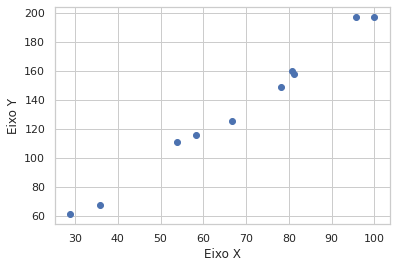

[[28.81684742]
 [35.75761893]
 [53.82107634]
 [58.21569264]
 [66.80974831]
 [78.25281369]
 [80.64869706]
 [81.29608217]
 [95.72416241]
 [99.95848131]]
[[ 60.85413282]
 [ 67.59066954]
 [110.76277271]
 [115.78578459]
 [125.31112852]
 [149.00386554]
 [159.61941373]
 [157.98528569]
 [197.17963609]
 [196.90739698]]


In [1]:
import pandas as pd
import numpy as np  # biblioteca que suporta arrays e matrizes multidimensionais - https://numpy.org/
from sklearn import preprocessing # usado para preprocessar a base de dados (normalização)

import matplotlib.pyplot as plt # biblioteca para plotar gráficos
plt.rc("font", size=14)

import seaborn as sns # biblioteca de visualização de dados
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('exemplo.csv',header=0)
print(data)

# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')
plt.scatter(data['X'], data['Y'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 

print(X)
print(Y)

media X   :  67.93012202823
media X^2 :  5124.991702295573
media Y   :  134.10000862119998
media Y^2 :  19994.153430738115
media XY  :  10117.850602443814

teta0  -0.08892359520725088
teta1  1.975396601829183

Equação da Reta: Y =  -0.08892359520725088  +  1.975396601829183  * X


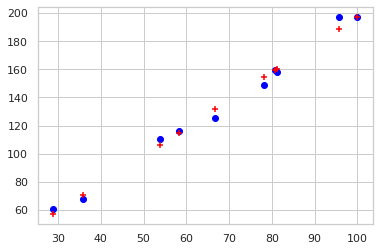

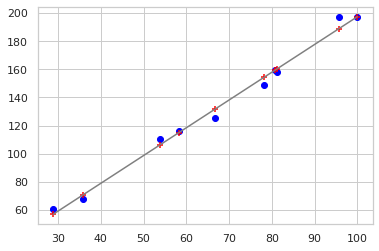

In [2]:
mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 = (mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

print('media X   : ',np.mean(X))
print('media X^2 : ',np.mean(X**2))
print('media Y   : ',np.mean(Y))
print('media Y^2 : ',np.mean(Y**2))
print('media XY  : ',np.mean(X*Y))
print()
print('teta0 ',teta0)
print('teta1 ',teta1)
print()
print('Equação da Reta: Y = ', teta0,' + ',teta1,' * X' )

# plotando os pontos previstos e a reta
Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.savefig('pontos_originais_previstos.png')
plt.show()

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.savefig('reta_prevista.png')
plt.show()


teta0  [-0.0889236]
teta1  [1.9753966]

Equação da Reta: Y =  [-0.0889236]  +  [1.9753966]  * X
19.310387739177333
Erro quadrado medio: [9.65519387]


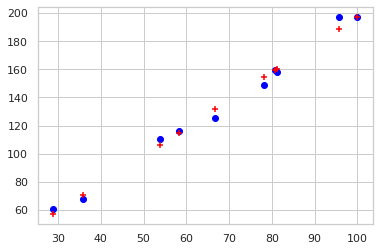

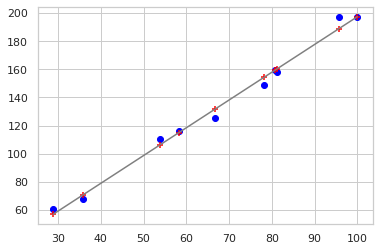

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg = linear_model.LinearRegression()
reg.fit(X, Y)

teta1 = reg.coef_[0]
teta0 = reg.intercept_


print()
print('teta0 ',teta0)
print('teta1 ',teta1)
print()
print('Equação da Reta: Y = ', teta0,' + ',teta1,' * X' )

# plotando os pontos previstos e a reta
Y_pred_media = teta0+teta1*X

n = Y.size
error = 0
# for yReal, xReal in Y, X:
for i in range(n):
    error += (1/(2*n))*(Y[i] - (teta1*X[i]+teta0))**2

print("Erro quadrado medio:", mean_squared_error(Y,Y_pred_media))
print("Erro quadrado medio:",error)
plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.savefig('pontos_originais_previstos.png')
plt.show()

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.savefig('reta_prevista.png')
plt.show()